<a href="https://colab.research.google.com/github/shadab4150/ML-assignment-notebooks/blob/master/Predicting_safety_of_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [0]:
car=pd.read_csv('car.csv')

In [20]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
car.shape

(1728, 7)

In [22]:
car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
Class        int64
dtype: object

In [0]:
car=car.dropna()

In [26]:
car.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class'], dtype='object')

In [0]:
car=car.rename(columns={'class':'Class'})

In [0]:
car_class=car['Class'].unique()

In [25]:
car_class

array([4, 3, 1, 2])

In [0]:
def clas(x):
  if x=='unacc':
    return 4
  elif x=='acc':
    return 3
  elif x=='good':
    return 2
  elif x=='vgood':
    return 1

In [0]:
car.Class=car.Class.apply(clas,convert_dtype=True)

In [0]:
col=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']

In [32]:
for i in col:
  print(car[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
[4 3 1 2]


In [0]:
df=car.copy()

In [0]:
df=pd.get_dummies(df,columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [35]:
df.head(10)

,Class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
5,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
6,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
7,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
8,4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
9,4,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [0]:
clean_data=df.copy()

In [0]:
y=clean_data[['Class']].copy()

In [39]:
y.head()

,Class
0,4
1,4
2,4
3,4
4,4


In [40]:
clean_data.columns

Index(['Class', 'buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2',
       'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4',
       'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small',
       'safety_high', 'safety_low', 'safety_med'],
      dtype='object')

In [0]:
X=clean_data[[ 'buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2',
       'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4',
       'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small',
       'safety_high', 'safety_low', 'safety_med']].copy()

In [42]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [43]:
X.shape

(1728, 21)

In [44]:
y.shape

(1728, 1)

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [60]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


y_train.describe()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Class
count,1036.000000
mean,3.574324
std,0.741637
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


In [47]:
X_train.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1133,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1005,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
438,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
774,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
769,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1


In [48]:
X_train.shape

(1157, 21)

In [49]:
y_train.shape

(1157, 1)

In [65]:
car_classifier = DecisionTreeClassifier()
car_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
sns.barplot(x='Class',)

In [0]:
y1=y_test.copy()

In [0]:
y2=data.copy()

In [71]:
y1.shape

(571, 1)

In [73]:
y1.head()

,Class
1539,4
534,4
518,4
1407,4
1015,3


In [80]:
y2.shape

(571, 1)

In [154]:
y1.shape

(571, 1)

In [90]:
y1.dtypes

Class    int64
dtype: object

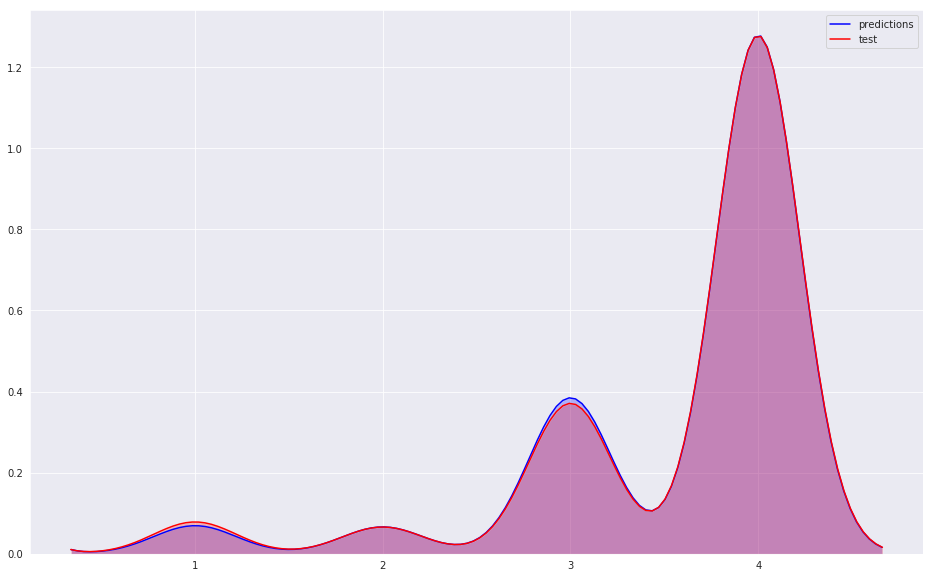

In [168]:
sns.set_style('darkgrid')
plt.figure(1,figsize=(16,10))
sns.kdeplot(y2.predictions,shade=True,color='b',label='predictions')
sns.kdeplot(y1.Class,shade=True,color='r',label='test')
plt.legend()
plt.show()




In [52]:
.type(car_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [0]:
predictions = car_classifier.predict(X_test)

In [54]:
predictions[:10]

array([4, 3, 4, 4, 3, 4, 4, 3, 4, 4])

In [56]:
y_test['Class'][:10]

710     4
641     3
1       4
262     4
557     3
240     4
212     4
1669    2
1136    4
41      4
Name: Class, dtype: int64

In [67]:
accuracy_score(y_true = y_test, y_pred = predictions)*100

96.8476357267951

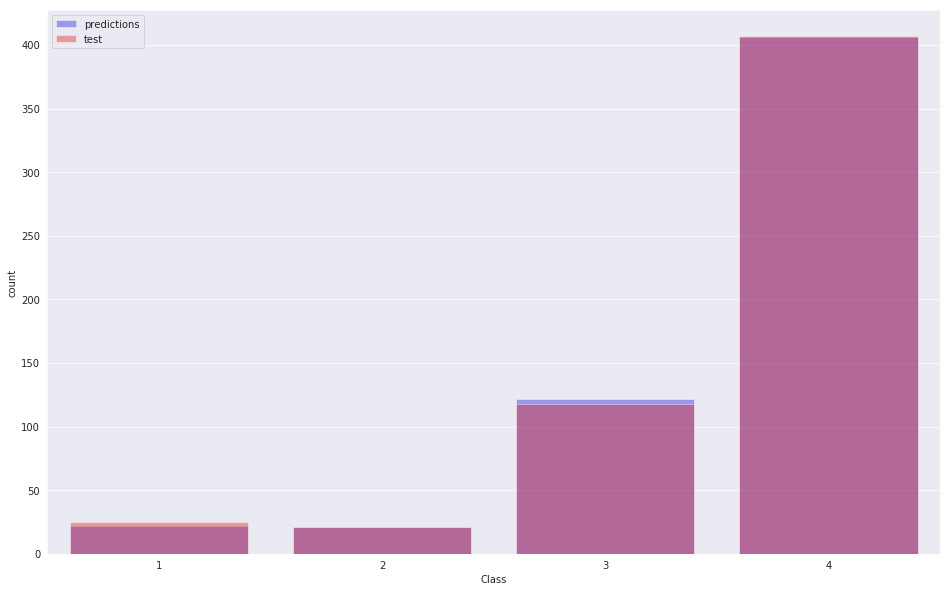

In [166]:

plt.figure(1,figsize=(16,10))
sns.countplot(x='predictions',data=y2,alpha=0.4,color='blue',label='predictions')
sns.countplot(x='Class',data=y1,alpha=0.4,color='red',label='test')
plt.legend()
plt.show()

# Different color on each bar shows the in accuracy as the accuracy score  is 96%